In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import geopandas as gpd
#import geopy?
%matplotlib inline

In [2]:
def embed_map(m):
    from IPython.display import IFrame

    m.save('index.html')
    return IFrame('index.html', width='100%', height='750px')

In [3]:
acs_datapath = "../Dept_37-00049/37-00049_ACS_data/"

In [4]:
education_data = "37-00049_ACS_education-attainment/ACS_16_5YR_S1501_with_ann.csv"

In [5]:
education_df = pd.read_csv(acs_datapath + education_data, header = 0, skiprows=[1])
sub_header = pd.read_csv(acs_datapath + education_data, header = 1).keys()

In [6]:
print(education_df.shape)
education_df["GEO.id2"] = pd.to_numeric(education_df["GEO.id2"])

c = list(education_df.columns)
c[3:] = ["education_" + c_name for c_name in c[3:]]
education_df.columns = c

education_df.head()

(529, 771)


,GEO.id,GEO.id2,GEO.display-label,education_HC01_EST_VC02,education_HC01_MOE_VC02,education_HC02_EST_VC02,education_HC02_MOE_VC02,education_HC03_EST_VC02,education_HC03_MOE_VC02,education_HC04_EST_VC02,...,education_HC02_EST_VC85,education_HC02_MOE_VC85,education_HC03_EST_VC85,education_HC03_MOE_VC85,education_HC04_EST_VC85,education_HC04_MOE_VC85,education_HC05_EST_VC85,education_HC05_MOE_VC85,education_HC06_EST_VC85,education_HC06_MOE_VC85
0,1400000US48113000100,48113000100,"Census Tract 1, Dallas County, Texas",195,101,(X),(X),90,69,(X),...,(X),(X),178750,97008,(X),(X),91507,10438,(X),(X)
1,1400000US48113000201,48113000201,"Census Tract 2.01, Dallas County, Texas",36,25,(X),(X),36,25,(X),...,(X),(X),128182,33333,(X),(X),76875,16293,(X),(X)
2,1400000US48113000202,48113000202,"Census Tract 2.02, Dallas County, Texas",217,95,(X),(X),82,86,(X),...,(X),(X),101824,14028,(X),(X),57813,13941,(X),(X)
3,1400000US48113000300,48113000300,"Census Tract 3, Dallas County, Texas",262,176,(X),(X),176,138,(X),...,(X),(X),71250,36939,(X),(X),54375,21490,(X),(X)
4,1400000US48113000401,48113000401,"Census Tract 4.01, Dallas County, Texas",740,194,(X),(X),283,113,(X),...,(X),(X),58125,21588,(X),(X),55735,4681,(X),(X)


In [7]:
FIPS_state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}

In [8]:
tx_census_shape_dir = "../tl_2016_48_tract/"
tx_census_shp = "tl_2016_48_tract.shp"

In [9]:
tx_census_shp_df = gpd.read_file("../tl_2016_48_tract.shp")
tx_census_shp_df["GEOID"] = pd.to_numeric(tx_census_shp_df["GEOID"])
tx_census_shp_df.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,48,201,542301,48201542301,5423.01,Census Tract 5423.01,G5020,S,5956745,15456,+29.8204990,-095.7316493,"POLYGON ((-95.75223799999999 29.831686, -95.75..."
1,48,201,552601,48201552601,5526.01,Census Tract 5526.01,G5020,S,2911911,4263,+29.9629845,-095.5679180,"POLYGON ((-95.585241 29.966226, -95.5852209999..."
2,48,157,673800,48157673800,6738,Census Tract 6738,G5020,S,14100089,1008190,+29.5874575,-095.7125243,"POLYGON ((-95.758386 29.583531, -95.757993 29...."
3,48,157,674000,48157674000,6740,Census Tract 6740,G5020,S,4826110,65291,+29.5869509,-095.6224534,"POLYGON ((-95.63467299999999 29.589525, -95.63..."
4,48,157,674100,48157674100,6741,Census Tract 6741,G5020,S,4170610,0,+29.5791692,-095.5995891,"POLYGON ((-95.614667 29.578282, -95.6133859999..."


In [10]:
tx_census_shp_df.keys()
#print(type(tx_census_shp_df["geometry"]))

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [11]:
education_with_geo = education_df.merge(tx_census_shp_df, left_on='GEO.id2', right_on='GEOID', how='left')

geometry = education_with_geo["geometry"]
education_with_geo.drop(["geometry"], axis = 1)
education_with_geo = gpd.GeoDataFrame(education_with_geo, crs=tx_census_shp_df["geometry"].crs, geometry=geometry)

In [12]:
education_with_geo.head()

,GEO.id,GEO.id2,GEO.display-label,education_HC01_EST_VC02,education_HC01_MOE_VC02,education_HC02_EST_VC02,education_HC02_MOE_VC02,education_HC03_EST_VC02,education_HC03_MOE_VC02,education_HC04_EST_VC02,...,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,1400000US48113000100,48113000100,"Census Tract 1, Dallas County, Texas",195,101,(X),(X),90,69,(X),...,48113000100,1,Census Tract 1,G5020,S,3064914,511269,+32.8166094,-096.7365761,"POLYGON ((-96.75300799999999 32.815674, -96.75..."
1,1400000US48113000201,48113000201,"Census Tract 2.01, Dallas County, Texas",36,25,(X),(X),36,25,(X),...,48113000201,2.01,Census Tract 2.01,G5020,S,1762502,0,+32.8327403,-096.7571634,"POLYGON ((-96.76156399999999 32.829894, -96.76..."
2,1400000US48113000202,48113000202,"Census Tract 2.02, Dallas County, Texas",217,95,(X),(X),82,86,(X),...,48113000202,2.02,Census Tract 2.02,G5020,S,1571513,30513,+32.8318688,-096.7662373,"POLYGON ((-96.770189 32.82906, -96.770167 32.8..."
3,1400000US48113000300,48113000300,"Census Tract 3, Dallas County, Texas",262,176,(X),(X),176,138,(X),...,48113000300,3,Census Tract 3,G5020,S,1809161,0,+32.8301654,-096.7761239,"POLYGON ((-96.78599 32.822262, -96.78561099999..."
4,1400000US48113000401,48113000401,"Census Tract 4.01, Dallas County, Texas",740,194,(X),(X),283,113,(X),...,48113000401,4.01,Census Tract 4.01,G5020,S,2032889,0,+32.8113683,-096.8294337,"POLYGON ((-96.84267 32.81611, -96.842361999999..."


In [13]:
dallas_police_shape_path = "../Dept_37-00049/37-00049_Shapefiles/EPIC.shp"

In [14]:
dallas_police_shape_df = gpd.read_file(dallas_police_shape_path)
dallas_police_shape_df.head()

dallas_police_shape_df["geometry"] = dallas_police_shape_df["geometry"].to_crs(education_with_geo["geometry"].crs)
dallas_police_shape_df.crs = education_with_geo.crs

dallas_police_shape_df.head()

,Name,Shape_STAr,Shape_STLe,geometry
0,EPIC_Fair Park,9.312213e+07,70821.503172,"POLYGON ((-96.7373391444538 32.79105860853344,..."
1,EPIC_CampWisdomCorridor,1.139695e+08,57536.951272,"POLYGON ((-96.8632907544893 32.67178827185338,..."
2,EPIC West Dallas,1.258257e+08,45373.481738,POLYGON ((-96.84478909451936 32.76384812895373...
3,EPIC Vickery Meadow,5.226778e+07,30305.941933,POLYGON ((-96.75677506831076 32.88351556650091...
4,EPIC_Lancaster Corridor,7.831274e+07,39182.926747,"POLYGON ((-96.77515500053748 32.7129630002214,..."


In [15]:
census_police_district_id = []
census_police_district_percent_overlap = []

for i in range(education_with_geo.shape[0]):
    g = education_with_geo["geometry"][i]
    list_of_matches = []
    perc_overlap = []
    for j in range(dallas_police_shape_df.shape[0]):
        a = dallas_police_shape_df["geometry"][j].intersection(g)
        if a.area != 0:
            percent_overlap = 100 * (a.area / g.area)
            list_of_matches.append(dallas_police_shape_df["Name"][j])
            perc_overlap.append(percent_overlap)
    census_police_district_id.append(tuple(list_of_matches))
    census_police_district_percent_overlap.append(tuple(perc_overlap))   
    
education_with_geo["Police District ID"] = pd.Series(census_police_district_id)
education_with_geo["Percentage Overlap"] = pd.Series(census_police_district_percent_overlap)

In [16]:
education_with_geo = education_with_geo[education_with_geo["Police District ID"] != ()]

In [17]:
print(education_with_geo.shape)
education_with_geo.head()

(53, 786)


,GEO.id,GEO.id2,GEO.display-label,education_HC01_EST_VC02,education_HC01_MOE_VC02,education_HC02_EST_VC02,education_HC02_MOE_VC02,education_HC03_EST_VC02,education_HC03_MOE_VC02,education_HC04_EST_VC02,...,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Police District ID,Percentage Overlap
36,1400000US48113002000,48113002000,"Census Tract 20, Dallas County, Texas",677,250,(X),(X),304,221,(X),...,Census Tract 20,G5020,S,2393483,62043,+32.7597444,-096.8173369,"POLYGON ((-96.82293399999999 32.756332, -96.82...","(EPIC West Dallas,)","(0.011547410485490643,)"
39,1400000US48113002400,48113002400,"Census Tract 24, Dallas County, Texas",287,99,(X),(X),106,72,(X),...,Census Tract 24,G5020,S,1255975,0,+32.7939108,-096.7573364,"POLYGON ((-96.76912299999999 32.785823, -96.76...","(EPIC_Fair Park,)","(0.2240738668413529,)"
40,1400000US48113002500,48113002500,"Census Tract 25, Dallas County, Texas",426,148,(X),(X),198,94,(X),...,Census Tract 25,G5020,S,4202733,0,+32.7853521,-096.7452474,"POLYGON ((-96.76833499999999 32.784686, -96.76...","(EPIC_Fair Park,)","(69.68153933503571,)"
41,1400000US48113002701,48113002701,"Census Tract 27.01, Dallas County, Texas",370,168,(X),(X),245,137,(X),...,Census Tract 27.01,G5020,S,1867998,386013,+32.7738368,-096.7396835,"POLYGON ((-96.751527 32.776972, -96.751176 32....","(EPIC_Fair Park,)","(51.32021146534645,)"
42,1400000US48113002702,48113002702,"Census Tract 27.02, Dallas County, Texas",184,64,(X),(X),103,55,(X),...,Census Tract 27.02,G5020,S,1069619,0,+32.7701729,-096.7507889,"POLYGON ((-96.75988099999999 32.770313, -96.75...","(EPIC_Fair Park,)","(87.1240072032631,)"


In [18]:
centering_coord = [float(education_with_geo["INTPTLAT"].values[0]), float(education_with_geo["INTPTLON"].values[0])]

In [19]:
mapa = folium.Map(centering_coord, height=400, zoom_start=10, tiles='Stamen Toner')
folium.GeoJson(education_with_geo, style_function= lambda x:{'color':'blue'}).add_to(mapa)
folium.GeoJson(dallas_police_shape_df, style_function= lambda x:{'color':'red'}).add_to(mapa)
mapa
embed_map(mapa)

In [20]:
#poverty, education, race sex age

In [21]:
race_sex_age_path = "37-00049_ACS_race-sex-age/ACS_15_5YR_DP05_with_ann.csv"
poverty_path = "37-00049_ACS_poverty/ACS_16_5YR_S1701_with_ann.csv"

In [22]:
race_sex_age_df = pd.read_csv(acs_datapath + race_sex_age_path, header = 0, skiprows=[1])
poverty_df = pd.read_csv(acs_datapath + poverty_path, header = 0, skiprows=[1])

race_sex_age_df["GEO.id2"] = pd.to_numeric(race_sex_age_df["GEO.id2"])
poverty_df["GEO.id2"] = pd.to_numeric(poverty_df["GEO.id2"])

c = list(race_sex_age_df.columns)
c[3:] = ["race_sex_age_" + c_name for c_name in c[3:]]
race_sex_age_df.columns = c

c = list(poverty_df.columns)
c[3:] = ["poverty_" + c_name for c_name in c[3:]]
poverty_df.columns = c

In [23]:
census_master_df = education_with_geo.merge(race_sex_age_df, left_on='GEO.id2', right_on='GEO.id2', how='left')
census_master_df = census_master_df.merge(poverty_df, left_on='GEO.id2', right_on='GEO.id2', how='left')

In [24]:
#how to stratify by police districts

In [25]:
where_id = census_master_df["Police District ID"].apply(lambda x: "EPIC West Dallas" in x)
census = census_master_df[where_id == True]

In [30]:
census_reduced = census[["poverty_HC03_EST_VC18", "poverty_HC03_EST_VC19", "poverty_HC03_EST_VC20", "poverty_HC03_EST_VC21", 
        "poverty_HC03_EST_VC22", "poverty_HC03_EST_VC23", "poverty_HC03_EST_VC26",
        "race_sex_age_HC03_VC49", "race_sex_age_HC03_VC50", "race_sex_age_HC03_VC51", "race_sex_age_HC03_VC56", 
                         "race_sex_age_HC03_VC64", "race_sex_age_HC03_VC69", "race_sex_age_HC03_VC87"
                        ]].replace("-", "0.0")
census_reduced.columns = ["white_pov", "black_pov", "native_american_pov", "asian_pov", "pacific_islander_pov", "other_pov", "hispanic_pov", 
                          "white_prop", "black_prop", "native_american_prop", "asian_prop", "pacific_islander_prop", "other_prop", "hispanic_prop"]
census_reduced = census_reduced[["white_prop", "white_pov", "black_prop", "black_pov", "asian_prop", "asian_pov", "hispanic_prop", "hispanic_pov",
                                 "other_prop", "other_pov", "native_american_prop", "native_american_pov", "pacific_islander_prop", "pacific_islander_pov"]]
census_reduced["district"] = census.loc[census_reduced.index, "GEO.id2"]
census_reduced["hispanic_prop"] = census_reduced["hispanic_prop"].astype("str")


In [31]:
first2 = census_reduced["hispanic_prop"].astype("str").str.extract("(^\d\d)")[0]
last2 = census_reduced["hispanic_prop"].astype("str").str.extract("(\d\d$)")[0]
census_reduced["hispanic_prop"] = first2 + "." + last2

In [32]:
census_reduced

,white_prop,white_pov,black_prop,black_pov,asian_prop,asian_pov,hispanic_prop,hispanic_pov,other_prop,other_pov,native_american_prop,native_american_pov,pacific_islander_prop,pacific_islander_pov,district
0,66.8,23.7,17.2,15.6,0.9,39.2,53.50,23.4,11.9,20.9,0.2,0.0,0.0,0.0,48113002000
9,84.3,17.2,6.5,35.4,1.5,51.9,42.11,22.4,5.3,4.6,0.5,0.0,0.0,0.0,48113004201
10,76.9,19.4,12.2,42.8,0.0,0.0,17.77,16.2,10.4,4.7,0.0,0.0,0.0,0.0,48113004300
11,82.0,9.9,6.2,4.8,1.1,0.0,33.89,18.8,4.9,0.0,0.0,0.0,0.0,0.0,48113004400
14,79.8,51.2,13.2,65.9,0.3,0.0,35.12,50.4,6.2,7.8,0.0,0.0,0.0,0.0,48113006900
33,47.2,29.5,39.4,40.3,0.0,0.0,46.90,25.4,13.2,0.0,0.2,0.0,0.0,0.0,48113010101
34,85.4,18.7,6.4,48.2,0.0,0.0,30.29,20.2,7.6,33.3,0.0,0.0,0.0,0.0,48113010102
52,26.6,46.8,62.0,60.0,5.0,22.1,53.22,49.5,4.4,92.9,0.8,0.0,0.0,0.0,48113020500


In [50]:
prop_columns = ["white_prop", "black_prop", "hispanic_prop", "asian_prop", "pacific_islander_prop", "native_american_prop", "other_prop"]
pov_columns = ["white_pov", "black_pov", "hispanic_pov", "asian_pov", "pacific_islander_pov", "native_american_pov", "other_pov"]
race = ["White", "Black", "Hispanic", "Asian", "Pacific Islander", "Native American", "Other"]


In [38]:
census_reduced[prop_columns]

,white_prop,black_prop,hispanic_prop,asian_prop,pacific_islander_prop,native_american_prop,other_prop
0,66.8,17.2,53.50,0.9,0.0,0.2,11.9
9,84.3,6.5,42.11,1.5,0.0,0.5,5.3
10,76.9,12.2,17.77,0.0,0.0,0.0,10.4
11,82.0,6.2,33.89,1.1,0.0,0.0,4.9
14,79.8,13.2,35.12,0.3,0.0,0.0,6.2
33,47.2,39.4,46.90,0.0,0.0,0.2,13.2
34,85.4,6.4,30.29,0.0,0.0,0.0,7.6
52,26.6,62.0,53.22,5.0,0.0,0.8,4.4


In [40]:
len(census_reduced["district"].unique())

8

In [65]:
prop_values

array(['66.8', '17.2', '53.50', '0.9', '0.0', '0.2', '11.9', '84.3',
       '6.5', '42.11', '1.5', '0.0', '0.5', '5.3', '76.9', '12.2',
       '17.77', '0.0', '0.0', '0.0', '10.4', '82.0', '6.2', '33.89',
       '1.1', '0.0', '0.0', '4.9', '79.8', '13.2', '35.12', '0.3', '0.0',
       '0.0', '6.2', '47.2', '39.4', '46.90', '0.0', '0.0', '0.2', '13.2',
       '85.4', '6.4', '30.29', '0.0', '0.0', '0.0', '7.6', '26.6', '62.0',
       '53.22', '5.0', '0.0', '0.8', '4.4'], dtype=object)

In [68]:
np.repeat(race, 8)

array(['White', 'White', 'White', 'White', 'White', 'White', 'White',
       'White', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black',
       'Black', 'Black', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic',
       'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Asian', 'Asian',
       'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian',
       'Pacific Islander', 'Pacific Islander', 'Pacific Islander',
       'Pacific Islander', 'Pacific Islander', 'Pacific Islander',
       'Pacific Islander', 'Pacific Islander', 'Native American',
       'Native American', 'Native American', 'Native American',
       'Native American', 'Native American', 'Native American',
       'Native American', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other'], dtype='<U16')

In [118]:
prop_values = census_reduced[prop_columns].values.flatten()
pov_values = census_reduced[pov_columns].values.flatten()
race_values = np.repeat(race, len(census_reduced["district"].unique()))
districts = census_reduced["district"].tolist() * 7
plot_df = pd.DataFrame({"race": race_values, "prop_race": prop_values, "pov_race": pov_values, "district": districts})
plot_df["prop_race"] = plot_df["prop_race"].astype("float")
plot_df["pov_race"] = plot_df["pov_race"].astype("float")
#plot_df["district"] = plot_df["district"].astype("str")

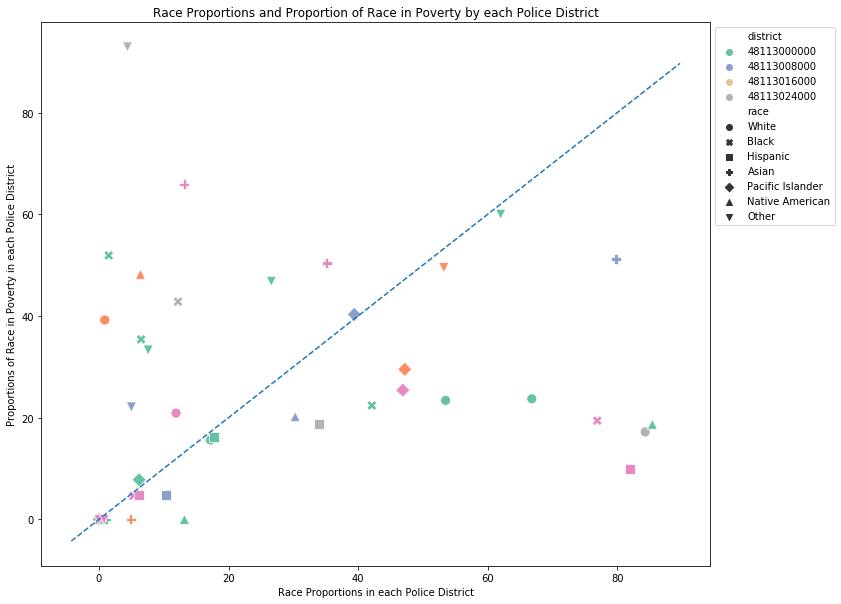

In [119]:
import matplotlib.cm as cm
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
plt.figure (figsize = (12, 10))
sns.scatterplot(x = "prop_race", y = "pov_race", hue = "district", style = "race", s = 100, palette = "Set2", data = plot_df);
plt.legend(bbox_to_anchor = (1, 1), loc = "best");
abline(1, 0);
plt.xlabel("Race Proportions in each Police District");
plt.ylabel("Proportions of Race in Poverty in each Police District");
plt.title("Race Proportions and Proportion of Race in Poverty by each Police District");

In [112]:
plot_df["district"].unique()

array([48113002000, 48113004201, 48113004300, 48113004400, 48113006900,
       48113010101, 48113010102, 48113020500], dtype=int64)

In [ ]:
plot_df["district"]

In [115]:
plot_df["district"].astype("str").isin(["48113000000", "48113008000", "48113016000","48113024000"])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
Name: district, dtype: bool

In [107]:
plot_df.loc[plot_df["district"].isin([48113000000, 48113008000, 48113016000, 48113024000]), :]

,race,prop_race,pov_race,district


In [103]:
plot_df.district[0
                ] + 1

48113002001